Identification of types of cells in a given sample uisng data analysis

mount the google drive

In [2]:
%cd '/content/drive/MyDrive'

/content/drive/MyDrive


In [1]:
!pip install muon

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.4/122.4 kB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 56.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 8.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 8.7 MB/s eta 0:00:00
  Created wheel for session-info: filename=session_info-1.0.0-py3-none-any.whl size=8026 sha256=7fc8be60d5875c64a0deffde58c4d579ca2d2bf86e8b585894765d25aaf18052
  Stored in directory: /root/.cache/pip/wheels/6a/aa/b9/eb5d4031476ec10802795b97ccf937b9bd998d68a9b268765a
Successfully built session-info


In [2]:
!pip install scanpy

Import the necesssary libraries

In [3]:
import numpy as np
import pandas as pd
import scanpy as sc
import anndata as ad
import muon as mu
import os

Import the data using a directory remove prefix if any after (pbmc_granulocyte_sorted_10k_) # the dataset is taken from https://support.10xgenomics.com/single-cell-multiome-atac-gex/datasets/1.0.0/pbmc_granulocyte_sorted_10k

In [4]:
data_dir = "/content/drive/MyDrive/data/pbmc10k"

In [5]:
import h5py
f = h5py.File('/content/drive/MyDrive/data/pbmc10k/filtered_feature_bc_matrix.h5','r')
for item in f.keys():
    print(item) #+ ":", f[item]

matrix


#Example of how a gene expression matrix look like:
Consider the below code

import pandas as pd

//Sample gene expression data (replace this with your actual data)
gene_names = ['Gene1', 'Gene2', 'Gene3']
cell_names = ['Cell1', 'Cell2', 'Cell3']
expression_data = [
    [10, 20, 30],
    [5, 15, 25],
    [8, 18, 28]
]

//Create a DataFrame for gene expression matrix
gene_expression_df = pd.DataFrame(expression_data, index=gene_names, columns=cell_names)

//Display the DataFrame
print("Gene Expression Matrix:")
print(gene_expression_df)
The output is likely to be
Gene Expression Matrix:

Cell1  Cell2  Cell3

Gene1     
          10     20     30

Gene2      
5     15     25

Gene3      
8     18     28

---



In [6]:
import h5py

# Open the HDF5 file
with h5py.File('/content/drive/MyDrive/data/pbmc10k/filtered_feature_bc_matrix.h5', 'r') as f:
    # Access the 'matrix' group
    matrix_group = f['matrix']

    # Iterate over the datasets within the 'matrix' group
    for dataset_name in matrix_group.keys():
        # Access each dataset
        dataset = matrix_group[dataset_name]

        # Print dataset name
        print("Dataset:", dataset_name)

        # Print dataset attributes (metadata)
        print("Attributes:")
        for attr_name, attr_value in dataset.attrs.items():
            print(f"{attr_name}: {attr_value}")

        # Check if the dataset is a regular dataset or a group
        if isinstance(dataset, h5py.Dataset):
            # Print dataset shape if it's a regular dataset
            print("Shape:", dataset.shape)

            # Optionally, you can print the first few values of the dataset
            # to get an idea of its contents
            print("Values (first 10 elements):", dataset[:10])
        else:
            # Print a message indicating that it's a group
            print("This is a group and does not have a shape.")

        print()  # Print an empty line for readability


Dataset: barcodes
Attributes:
Shape: (11909,)
Values (first 10 elements): [b'AAACAGCCAAGGAATC-1' b'AAACAGCCAATCCCTT-1' b'AAACAGCCAATGCGCT-1'
 b'AAACAGCCACACTAAT-1' b'AAACAGCCACCAACCG-1' b'AAACAGCCAGGATAAC-1'
 b'AAACAGCCAGTAGGTG-1' b'AAACAGCCAGTTTACG-1' b'AAACAGCCATCCAGGT-1'
 b'AAACATGCAAGGTCCT-1']

Dataset: data
Attributes:
Shape: (109104829,)
Values (first 10 elements): [1 1 1 1 1 1 1 1 1 6]

Dataset: features
Attributes:
This is a group and does not have a shape.

Dataset: indices
Attributes:
Shape: (109104829,)
Values (first 10 elements): [ 17  48  53  59  86 109 113 137 168 170]

Dataset: indptr
Attributes:
Shape: (11910,)
Values (first 10 elements): [    0 17186 26335 35767 37519 43124 48744 63438 72374 84004]

Dataset: shape
Attributes:
Shape: (2,)
Values (first 10 elements): [144978  11909]



**Read all the files from the directory**

In [7]:
# Remove file prefixes if any
prefix = "pbmc_granulocyte_sorted_10k_"
for file in os.listdir(data_dir):
    if file.startswith(prefix):
        new_filename = file[len(prefix):]
        print(new_filename)
        os.rename(os.path.join(data_dir, file), os.path.join(data_dir, new_filename))

In [8]:
mdata = mu.read_10x_h5(os.path.join(data_dir, "filtered_feature_bc_matrix.h5"))
mdata.var_names_make_unique()
mdata

/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Added `interval` annotation for features from /content/drive/MyDrive/data/pbmc10k/filtered_feature_bc_matrix.h5


/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/usr/local/lib/python3.10/dist-packages/mudata/_core/mudata.py:479: UserWarning: var_names are not unique. To make them unique, call `.var_names_make_unique`.
  warnings.warn(


Added peak annotation from /content/drive/MyDrive/data/pbmc10k/atac_peak_annotation.tsv to .uns['atac']['peak_annotation']
Added gene names to peak annotation in .uns['atac']['peak_annotation']


MuData object with n_obs × n_vars = 11909 × 144978
  var:	'gene_ids', 'feature_types', 'genome', 'interval'
  2 modalities
    rna:	11909 x 36601
      var:	'gene_ids', 'feature_types', 'genome', 'interval'
    atac:	11909 x 108377
      var:	'gene_ids', 'feature_types', 'genome', 'interval'
      uns:	'atac'

In [9]:
rna = mdata.mod['rna']
rna

AnnData object with n_obs × n_vars = 11909 × 36601
    var: 'gene_ids', 'feature_types', 'genome', 'interval'

#Pre-processing

We will perform quality control by filtering out the cells that do not pass it .

We removed the cells which were startign with (mt)-mitochondria as Mitochondrial genes are often used as a proxy for measuring the quality of single-cell RNA-seq data. Cells with a high proportion of reads mapped to mitochondrial genes are often considered to be of lower quality because increased mitochondrial gene expression can be indicative of stress or low-quality RNA.

When mitochondrial gene expression is higher in a cell, the RNA molecules are often considered to be of lower quality for the following reasons:


1. Apoptosis (Cell Death):
Dying Cells: Cells undergoing apoptosis (programmed cell death) have compromised integrity. They start to degrade, leading to the release of their contents, including mitochondrial RNA. This leakage of RNA increases the relative amount of mitochondrial transcripts in the sample.
Compromised RNA Integrity: The RNA from dying cells is often fragmented and degraded, leading to a lower overall quality of RNA.
2. Cell Lysis:
Cellular Damage During Preparation: If cells are damaged during the preparation process, their contents, including mitochondrial RNA, can spill out. This results in an artificially high amount of mitochondrial RNA.
Non-Specific RNA Release: Damaged or lysed cells release a mix of RNA, which can include degraded and low-quality RNA fragments.
3. Stress Responses:
Oxidative Stress: High mitochondrial gene expression can be a response to oxidative stress, which can damage cellular components, including RNA.
Stress-Induced Changes: Cells under stress might alter their gene expression profiles, increasing the production of mitochondrial RNA to cope with the stress. This altered profile can be an indicator of suboptimal cellular conditions.


In [10]:
rna.var['mt'] = rna.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(rna, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

In [11]:
n_genes_by_counts = rna.obs['n_genes_by_counts']
print(1)
print(n_genes_by_counts)
total_counts = rna.obs['total_counts']
print(2)
print(total_counts)
pct_counts_mt = rna.obs['pct_counts_mt']
print(3)
print(pct_counts_mt)


1
AAACAGCCAAGGAATC-1    3308
AAACAGCCAATCCCTT-1    1896
AAACAGCCAATGCGCT-1    2904
AAACAGCCACACTAAT-1     846
AAACAGCCACCAACCG-1    2282
                      ... 
TTTGTTGGTGTTAAAC-1    1525
TTTGTTGGTTAGGATT-1    2024
TTTGTTGGTTGCAGTA-1    2116
TTTGTTGGTTGGTTAG-1    1620
TTTGTTGGTTTGCAGA-1    1920
Name: n_genes_by_counts, Length: 11909, dtype: int32
2
AAACAGCCAAGGAATC-1    8380.0
AAACAGCCAATCCCTT-1    3771.0
AAACAGCCAATGCGCT-1    6876.0
AAACAGCCACACTAAT-1    1733.0
AAACAGCCACCAACCG-1    5415.0
                       ...  
TTTGTTGGTGTTAAAC-1    2866.0
TTTGTTGGTTAGGATT-1    4148.0
TTTGTTGGTTGCAGTA-1    4834.0
TTTGTTGGTTGGTTAG-1    2976.0
TTTGTTGGTTTGCAGA-1    4505.0
Name: total_counts, Length: 11909, dtype: float32
3
AAACAGCCAAGGAATC-1     7.470168
AAACAGCCAATCCCTT-1    10.527711
AAACAGCCAATGCGCT-1     6.457242
AAACAGCCACACTAAT-1    18.003462
AAACAGCCACCAACCG-1     6.500462
                        ...    
TTTGTTGGTGTTAAAC-1    11.060712
TTTGTTGGTTAGGATT-1     9.932498
TTTGTTGGTTGCAGTA-1 

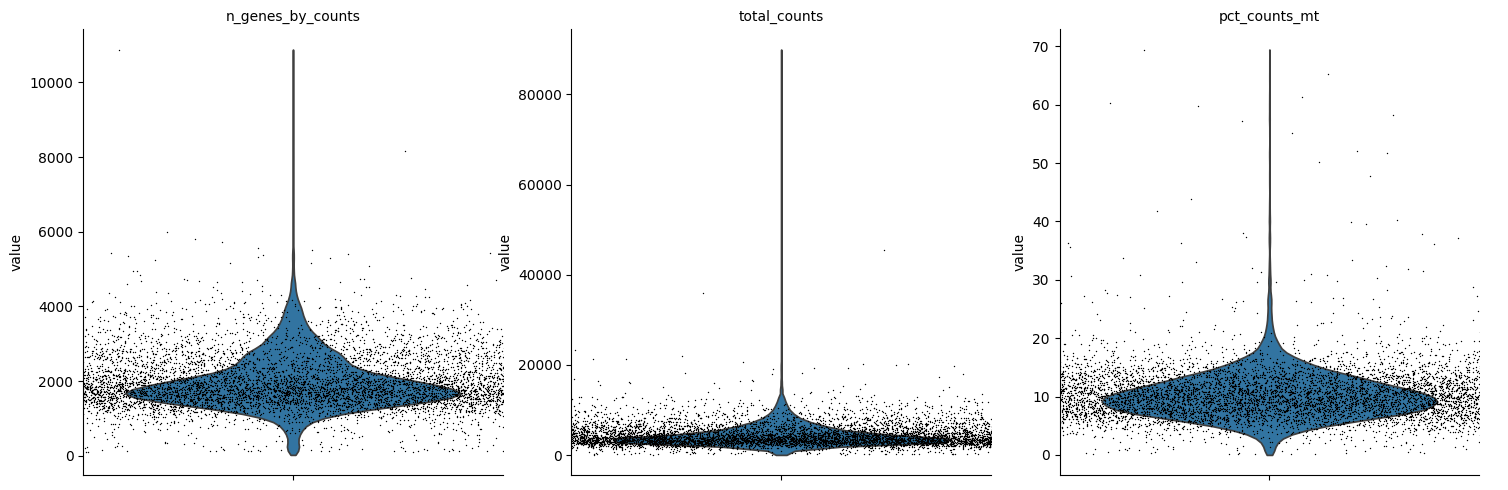

In [12]:
  sc.pl.violin(rna, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
              jitter=0.9, multi_panel=True)

The plot tells that 7% of the genes were mitochondria genes .
To calculate the number of RNA molecules in each cell, we sum up the expression levels of all genes in that cell. Similarly, to determine the number of genes expressed in each cell, we count the number of genes with non-zero expression levels.

Using the example gene expression matrix provided earlier:

```
|        | cell1 | cell2 | cell3 | cell4 |
|--------|-------|-------|-------|-------|
| gene1  |   10  |   20  |   30  |   15  |
| gene2  |   5   |   15  |   25  |   20  |
| gene3  |   8   |   18  |   28  |   12  |
```

For each cell:
- Number of RNA molecules = Sum of expression levels across all genes
- Number of genes expressed = Count of genes with non-zero expression levels

Let's calculate:

For cell1:
- Number of RNA molecules = 10 + 5 + 8 = 23
- Number of genes expressed = 3

For cell2:
- Number of RNA molecules = 20 + 15 + 18 = 53
- Number of genes expressed = 3

For cell3:
- Number of RNA molecules = 30 + 25 + 28 = 83
- Number of genes expressed = 3

For cell4:
- Number of RNA molecules = 15 + 20 + 12 = 47
- Number of genes expressed = 3

So, in each cell, we have:
- Cell1: 23 RNA molecules, 3 genes expressed
- Cell2: 53 RNA molecules, 3 genes expressed
- Cell3: 83 RNA molecules, 3 genes expressed
- Cell4: 47 RNA molecules, 3 genes expressed

filter out genes in such a manner that only genes that are expressed in at least 3 cells are kept , and discard the rest.

In [13]:
mu.pp.filter_var(rna, 'n_cells_by_counts', lambda x: x >= 3)

1. mu.pp.filter_obs(rna, 'n_genes_by_counts', lambda x: (x >= 200) & (x < 5000))

  It keeps the cells where the number of detected genes per cell is greater than or equal to 200 and less than 5000.Cells that meet this condition are retained, and others are filtered out.

2. mu.pp.filter_obs(rna, 'total_counts', lambda x: x < 15000)
  It keeps the cells where the total count of transcripts is less than 15000.
  Cells that have a total count of transcripts below 15000 are retained, and others are filtered out.
3. mu.pp.filter_obs(rna, 'pct_counts_mt', lambda x: x < 20):
  It keeps the cells where the percentage of counts mapped to mitochondrial genes is less than 20%.
  Cells with a percentage of mitochondrial counts less than 10% are retained, and others are filtered out.


In [14]:
mu.pp.filter_obs(rna, 'n_genes_by_counts', lambda x: (x >= 200) & (x < 5000))
mu.pp.filter_obs(rna, 'total_counts', lambda x: x < 15000)
mu.pp.filter_obs(rna, 'pct_counts_mt', lambda x: x < 10)

In [15]:
# Print the values after filtering
print("\nValues after filtering:")
print("n_genes_by_counts:")
print(rna.obs['n_genes_by_counts'])
print("total_counts:")
print(rna.obs['total_counts'])
print("pct_counts_mt:")
print(rna.obs['pct_counts_mt'])


Values after filtering:
n_genes_by_counts:
AAACAGCCAAGGAATC-1    3308
AAACAGCCAATGCGCT-1    2904
AAACAGCCACCAACCG-1    2282
AAACAGCCAGGATAAC-1    1353
AAACAGCCAGTAGGTG-1    3061
                      ... 
TTTGTTGGTCTTTATG-1    2792
TTTGTTGGTTAGGATT-1    2024
TTTGTTGGTTGCAGTA-1    2116
TTTGTTGGTTGGTTAG-1    1620
TTTGTTGGTTTGCAGA-1    1920
Name: n_genes_by_counts, Length: 6261, dtype: int32
total_counts:
AAACAGCCAAGGAATC-1    8380.0
AAACAGCCAATGCGCT-1    6876.0
AAACAGCCACCAACCG-1    5415.0
AAACAGCCAGGATAAC-1    2759.0
AAACAGCCAGTAGGTG-1    7614.0
                       ...  
TTTGTTGGTCTTTATG-1    6554.0
TTTGTTGGTTAGGATT-1    4148.0
TTTGTTGGTTGCAGTA-1    4834.0
TTTGTTGGTTGGTTAG-1    2976.0
TTTGTTGGTTTGCAGA-1    4505.0
Name: total_counts, Length: 6261, dtype: float32
pct_counts_mt:
AAACAGCCAAGGAATC-1    7.470168
AAACAGCCAATGCGCT-1    6.457242
AAACAGCCACCAACCG-1    6.500462
AAACAGCCAGGATAAC-1    6.922798
AAACAGCCAGTAGGTG-1    6.895193
                        ...   
TTTGTTGGTCTTTATG-1    6.

Here before filtering operation performed the length or cells taken into consideration were 11909 but after filtering no of cells taken into consideration are 6261
hence indicating a drop of neglected cells and important cells are taken into consideration .

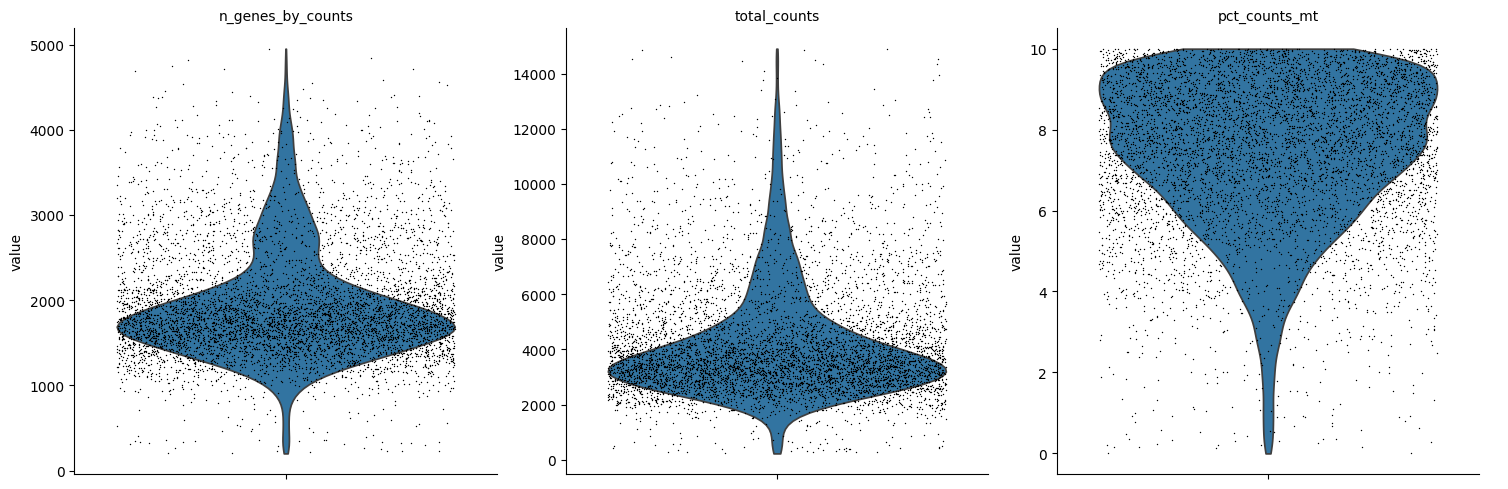

In [16]:
sc.pl.violin(rna, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

#Normalisation of the data:

### Example Gene Expression Matrix

Assume we have a gene expression matrix for 3 cells (Cell1, Cell2, Cell3) and 4 genes (GeneA, GeneB, GeneC, GeneD).

|       | GeneA | GeneB | GeneC | GeneD |
|-------|-------|-------|-------|-------|
| Cell1 |   10  |   20  |   30  |   40  |
| Cell2 |   5   |   15  |   10  |   20  |
| Cell3 |   20  |   25  |   15  |   30  |

### Step-by-Step Normalization Process

1. **Calculate the Total Expression per Cell**:
    - **Cell1**: \( 10 + 20 + 30 + 40 = 100 \)
    - **Cell2**: \( 5 + 15 + 10 + 20 = 50 \)
    - **Cell3**: \( 20 + 25 + 15 + 30 = 90 \)

2. **Choose the Target Sum**:
    - We want to normalize the total expression to 10,000 (target_sum = 1e4).

3. **Compute the Scaling Factor for Each Cell**:
    - **Cell1**: \( \frac{10000}{100} = 100 \)
    - **Cell2**: \( \frac{10000}{50} = 200 \)
    - **Cell3**: \( \frac{10000}{90} \approx 111.11 \)

4. **Scale the Gene Expression Values**:
    - **Cell1**:
        - GeneA: \( 10 \times 100 = 1000 \)
        - GeneB: \( 20 \times 100 = 2000 \)
        - GeneC: \( 30 \times 100 = 3000 \)
        - GeneD: \( 40 \times 100 = 4000 \)
    - **Cell2**:
        - GeneA: \( 5 \times 200 = 1000 \)
        - GeneB: \( 15 \times 200 = 3000 \)
        - GeneC: \( 10 \times 200 = 2000 \)
        - GeneD: \( 20 \times 200 = 4000 \)
    - **Cell3**:
        - GeneA: \( 20 \times 111.11 \approx 2222.22 \)
        - GeneB: \( 25 \times 111.11 \approx 2777.78 \)
        - GeneC: \( 15 \times 111.11 \approx 1666.67 \)
        - GeneD: \( 30 \times 111.11 \approx 3333.33 \)

### Normalized Gene Expression Matrix

|       | GeneA | GeneB | GeneC | GeneD |
|-------|-------|-------|-------|-------|
| Cell1 |  1000 |  2000 |  3000 |  4000 |
| Cell2 |  1000 |  3000 |  2000 |  4000 |
| Cell3 | 2222.22 | 2777.78 | 1666.67 | 3333.33 |

### Code Implementation with Scanpy

Assuming we have an AnnData object `rna`:

```python
import scanpy as sc
import pandas as pd

# Example data
data = {
    'GeneA': [10, 5, 20],
    'GeneB': [20, 15, 25],
    'GeneC': [30, 10, 15],
    'GeneD': [40, 20, 30]
}
cells = ['Cell1', 'Cell2', 'Cell3']

# Create AnnData object
rna = sc.AnnData(pd.DataFrame(data, index=cells))

# Print total expression per cell before normalization
print("Total expression per cell before normalization:")
print(rna.X.sum(axis=1))

# Normalize total expression to 10,000 counts per cell
sc.pp.normalize_total(rna, target_sum=1e4)

# Print total expression per cell after normalization
print("Total expression per cell after normalization:")
print(rna.X.sum(axis=1))

# Print the normalized data
print("Normalized data:")
print(rna.to_df())
```

### Output

Before normalization:

```
Total expression per cell before normalization:
[100  50  90]
```

After normalization:

```
Total expression per cell after normalization:
[10000. 10000. 10000.]
```

Normalized data:

|       | GeneA | GeneB | GeneC | GeneD |
|-------|-------|-------|-------|-------|
| Cell1 |  1000 |  2000 |  3000 |  4000 |
| Cell2 |  1000 |  3000 |  2000 |  4000 |
| Cell3 | 2222.22 | 2777.78 | 1666.67 | 3333.33 |

This normalization ensures that each cell's total expression sums to 10,000, making the data more comparable across cells, regardless of their initial total expression levels.

In [17]:
sc.pp.normalize_total(rna, target_sum=1e4)

To stablize the variance the logarithm of the normalized value is taken by adding 1 to it .

In [18]:
sc.pp.log1p(rna)

Feature selection

In [19]:
sc.pp.highly_variable_genes(rna, min_mean=0.02, max_mean=4, min_disp=0.5)

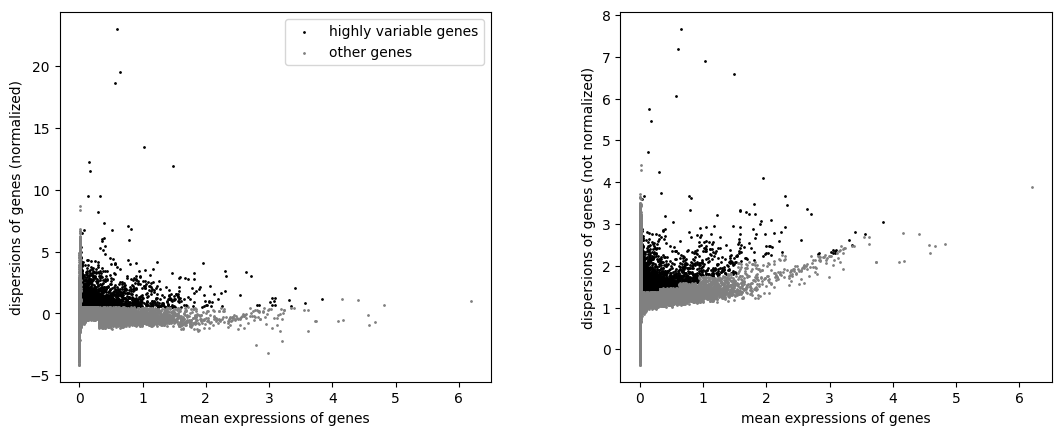

In [20]:
sc.pl.highly_variable_genes(rna)

In [21]:
np.sum(rna.var.highly_variable)# returns the total count of genes that are classified as highly variable in the dataset.

3081

we will save lng-normalised counts

In [22]:
rna.raw = rna

In [23]:
sc.pp.scale(rna, max_value=10)

#**Analysis**

## PCA and neighbourhood graph

In [24]:
sc.tl.pca(rna, svd_solver='arpack')

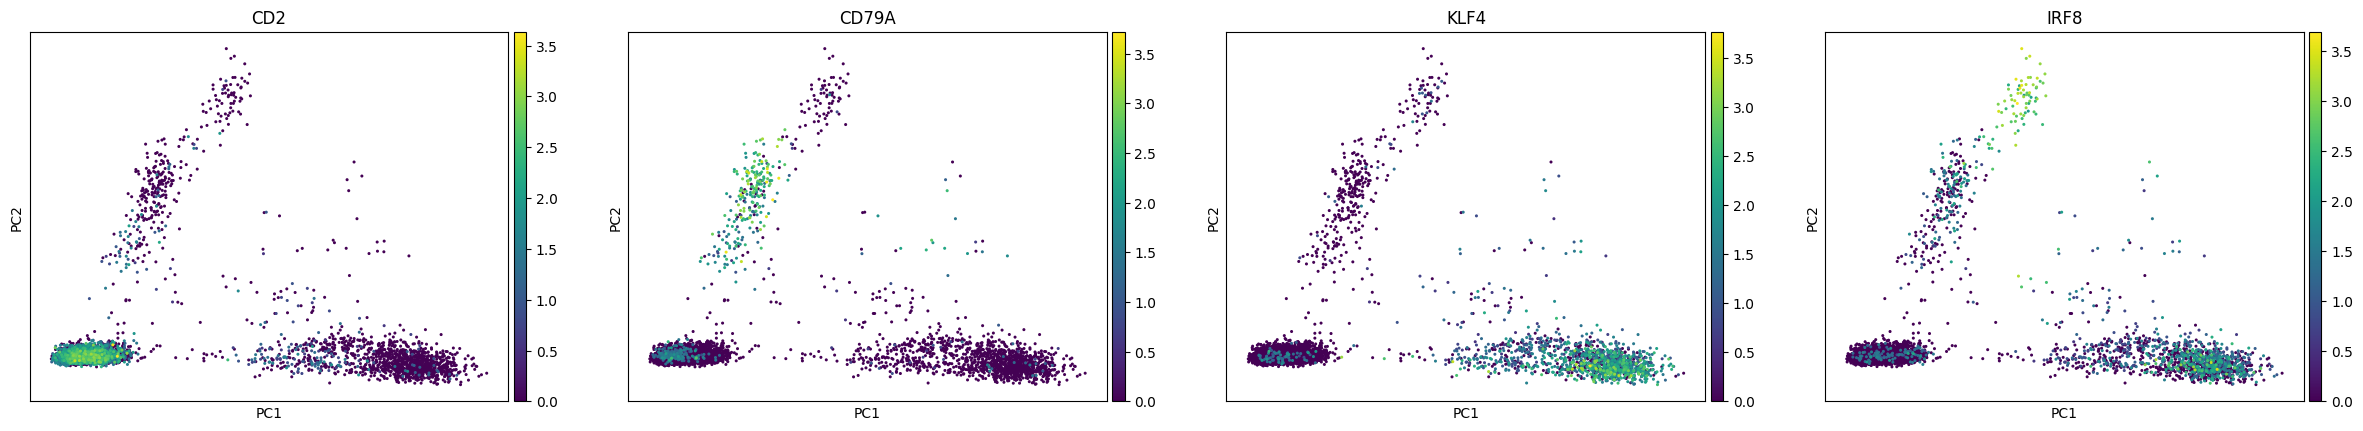

In [25]:
sc.pl.pca(rna, color=['CD2', 'CD79A', 'KLF4', 'IRF8'])

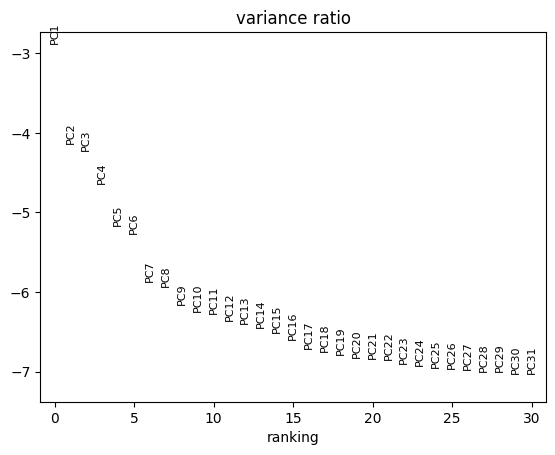

In [26]:
sc.pl.pca_variance_ratio(rna, log=True)

Based on this we get that variance ratio of principal component obtained from PCA .

In [27]:
sc.pp.neighbors(rna, n_neighbors=10, n_pcs=20)

In [28]:
!pip3 install igraph leidenalg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 38.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 43.7 MB/s eta 0:00:00


Non-linear dimensionality reduction and clustering

In [29]:
sc.tl.leiden(rna, resolution=.5)

<ipython-input-29-4f4ea7050700>:1: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(rna, resolution=.5)


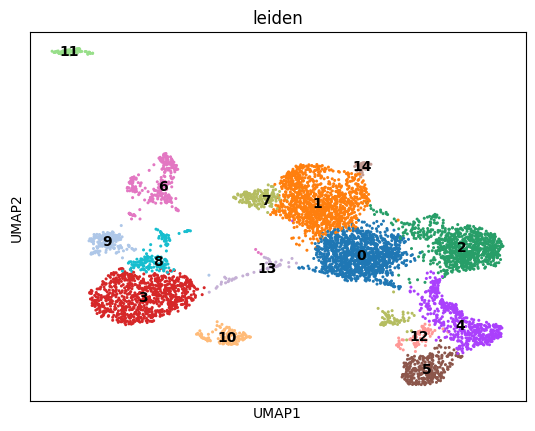

In [30]:
sc.tl.umap(rna, spread=1., min_dist=.5, random_state=11)
sc.pl.umap(rna, color="leiden", legend_loc="on data")

Marker genes and celltypes

In [ ]:
sc.tl.rank_genes_groups(rna, 'leiden', method='t-test')
result = rna.uns['rank_genes_groups']
groups = result['names'].dtype.names
pd.set_option('display.max_columns', 50)
pd.DataFrame(
    {group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names', 'pvals']}).head(10)

,0_n,0_p,1_n,1_p,2_n,2_p,3_n,3_p,4_n,4_p,5_n,5_p,6_n,6_p,7_n,7_p,8_n,8_p,9_n,9_p,10_n,10_p,11_n,11_p,12_n,12_p,13_n,13_p,14_n,14_p,15_n,15_p,16_n,16_p
0,PLXDC2,0.0,INPP4B,0.000000e+00,LEF1,0.0,LEF1,0.000000e+00,SLC8A1,0.0,CCL5,0.000000e+00,BANK1,0.000000e+00,GNLY,0.000000e+00,TCF7L2,0.000000e+00,NEAT1,3.539435e-211,IGHM,1.717809e-288,CD74,7.314984e-157,RPS29,6.906511e-18,SLC4A10,1.133609e-55,TCF4,2.131736e-108,BANK1,3.763633e-47,CDK6,1.042747e-13
1,VCAN,0.0,IL32,0.000000e+00,BACH2,0.0,BCL11B,0.000000e+00,AOAH,0.0,NKG7,6.546801e-264,CD74,0.000000e+00,NKG7,1.322685e-278,PSAP,0.000000e+00,PLXDC2,5.837124e-182,AFF3,7.544339e-270,CST3,1.627826e-113,RPS12,2.289788e-17,PHACTR2,5.608218e-47,RHEX,9.108057e-85,AFF3,3.540129e-43,MAML3,6.821405e-13
2,DPYD,0.0,LTB,0.000000e+00,PDE3B,0.0,BACH2,0.000000e+00,TYMP,0.0,IL32,5.707435e-285,RALGPS2,2.564289e-316,CD247,1.510337e-282,LYN,0.000000e+00,ZEB2,3.821995e-166,BANK1,4.769355e-241,HLA-DRB1,1.382746e-106,RPS27,3.991699e-16,NKG7,1.120089e-46,IRF8,2.498884e-83,CD74,4.056812e-40,SOX4,1.456600e-12
3,ARHGAP26,0.0,SYNE2,0.000000e+00,THEMIS,0.0,FHIT,0.000000e+00,PLXDC2,0.0,SYNE2,2.601561e-216,AFF3,1.996289e-313,PRF1,5.082463e-224,SAT1,0.000000e+00,LYST,2.413639e-152,CD74,1.556803e-232,HLA-DRA,4.685479e-104,RPS14,1.433868e-14,RORA,2.642896e-42,FCHSD2,1.102105e-83,MARCH1,3.041278e-38,NKAIN2,4.956515e-12
4,LRMDA,0.0,ANK3,0.000000e+00,NELL2,0.0,CAMK4,0.000000e+00,NEAT1,0.0,PRKCH,6.220694e-203,MS4A1,1.361491e-278,KLRD1,2.917589e-175,MTSS1,4.421420e-298,DPYD,2.703439e-156,FCRL1,6.639302e-170,HLA-DPB1,1.316249e-98,RPL13,3.639870e-14,SYNE2,1.361930e-41,UGCG,2.849759e-78,LYN,1.349819e-37,RPLP0,1.187222e-11
5,NEAT1,0.0,CDC14A,0.000000e+00,BCL11B,0.0,MALAT1,0.000000e+00,DPYD,0.0,GZMA,1.998590e-175,OSBPL10,8.911795e-228,GZMA,3.913497e-171,CST3,1.660528e-288,SLC8A1,3.767649e-141,RALGPS2,3.628678e-166,HLA-DPA1,1.421549e-96,RPL30,6.934495e-13,IL7R,2.665098e-37,AFF3,3.814409e-81,HLA-DRA,1.141582e-35,RACK1,2.365494e-11
6,FCN1,0.0,IL7R,0.000000e+00,CAMK4,0.0,RPS27A,0.000000e+00,ZEB2,0.0,SKAP1,4.924057e-185,HLA-DRA,6.100712e-255,SYNE1,4.917205e-165,WARS,3.235718e-281,TYMP,3.349479e-145,HLA-DRA,5.218862e-177,ACTB,1.727180e-97,RPL32,2.669911e-11,SKAP1,2.172269e-37,CD74,5.871142e-85,PLXDC2,9.282718e-33,RNF220,6.095781e-11
7,ZEB2,0.0,ITGB1,3.746179e-312,OXNAD1,0.0,RPS27,1.504422e-304,JAK2,0.0,A2M,9.922502e-164,CD79A,1.017956e-225,PRKCH,8.991974e-170,CTSS,7.578671e-312,LYN,4.655654e-143,BACH2,8.734901e-164,SAMHD1,1.704630e-95,RPS10,6.351071e-10,A2M,2.405911e-36,PLD4,6.527474e-73,MEF2C,5.807984e-31,ZNRF1,9.125703e-11
8,CSF3R,0.0,ARHGAP15,0.000000e+00,CD8B,0.0,TCF7,1.130064e-270,FCN1,0.0,HLA-B,8.705327e-170,PAX5,4.409163e-221,CTSW,7.274810e-158,COTL1,3.845213e-274,FCN1,8.937245e-135,PAX5,3.466935e-149,HLA-DQB1,1.056029e-88,RPS26,8.183827e-10,KLRB1,1.937944e-35,BCL11A,1.199667e-67,MS4A1,2.406745e-30,RPS3A,1.477149e-10
9,DENND1A,0.0,BCL11B,0.000000e+00,TXK,0.0,RPL3,1.882740e-297,DENND1A,0.0,SYNE1,7.294187e-161,BLK,1.280629e-195,MCTP2,1.457122e-153,TYMP,1.646252e-292,AOAH,4.788466e-141,MS4A1,3.121563e-133,HDAC9,4.063759e-90,RPL41,8.222230e-10,CCL5,8.721294e-35,RABGAP1L,1.325867e-70,PRKCB,5.573917e-30,EEF2,3.706141e-10


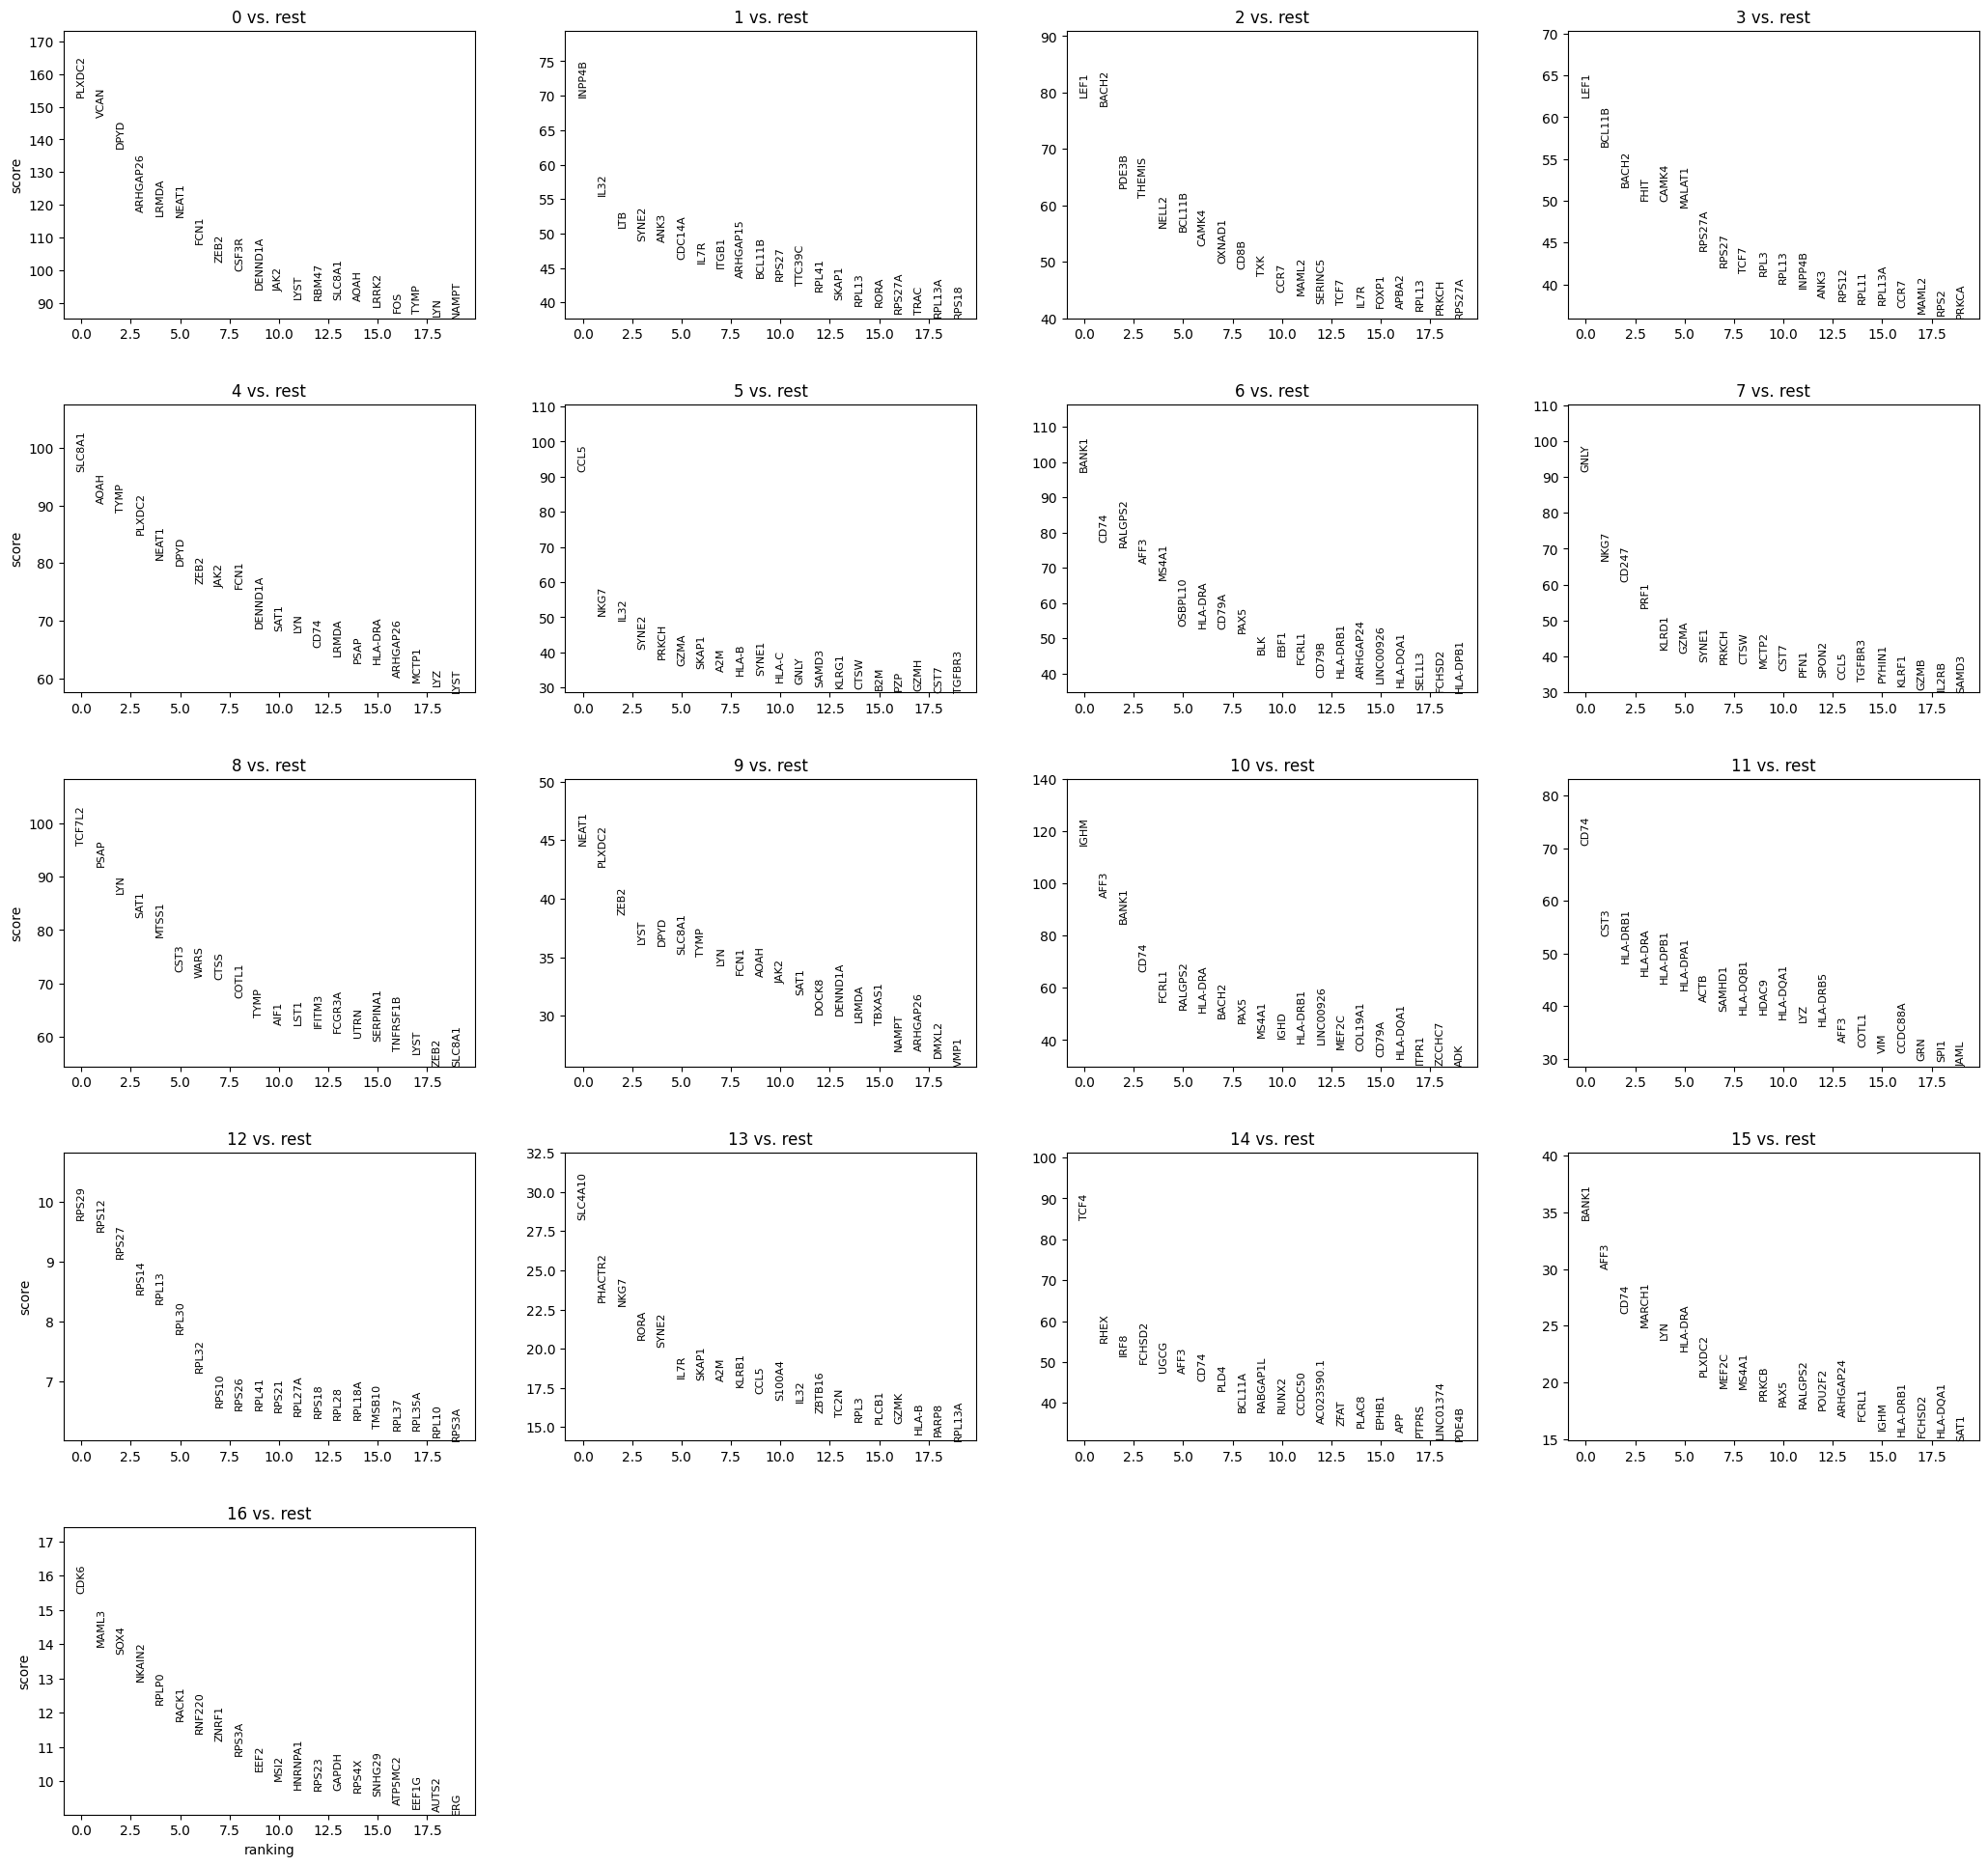

In [ ]:
sc.pl.rank_genes_groups(rna, n_genes=20, sharey=False)

In [ ]:
mu.pp.filter_obs(rna, "leiden", lambda x: ~x.isin(["9", "15", "12", "16"]))




In [ ]:
new_cluster_names = {
    "0": "CD4+ memory T", "1": "CD8+ naïve T", "3": "CD4+ naïve T",
    "5": "CD8+ activated T", "7": "NK", "13": "MAIT",
    "6": "memory B", "10": "naïve B",
    "4": "CD14 mono", "2": "intermediate mono", "8": "CD16 mono",
    "11": "mDC", "14": "pDC",
}

rna.obs['celltype'] = rna.obs.leiden.astype("str").values
rna.obs.celltype = rna.obs.celltype.astype("category")
rna.obs.celltype = rna.obs.celltype.cat.rename_categories(new_cluster_names)

In [ ]:
rna.obs.celltype.cat.reorder_categories([
    'CD4+ naïve T', 'CD4+ memory T', 'MAIT',
    'CD8+ naïve T', 'CD8+ activated T', 'NK',
    'naïve B', 'memory B',
    'CD14 mono', 'intermediate mono', 'CD16 mono',
    'mDC', 'pDC'])

AAACAGCCAAGGAATC-1    intermediate mono
AAACAGCCAATCCCTT-1         CD8+ naïve T
AAACAGCCAATGCGCT-1         CD4+ naïve T
AAACAGCCACCAACCG-1    intermediate mono
AAACAGCCAGGATAAC-1         CD4+ naïve T
                            ...        
TTTGTTGGTGTTAAAC-1    intermediate mono
TTTGTTGGTTAGGATT-1                   NK
TTTGTTGGTTGCAGTA-1         CD8+ naïve T
TTTGTTGGTTGGTTAG-1         CD8+ naïve T
TTTGTTGGTTTGCAGA-1     CD8+ activated T
Name: celltype, Length: 10881, dtype: category
Categories (13, object): ['CD4+ naïve T', 'CD4+ memory T', 'MAIT', 'CD8+ naïve T', ...,
                          'intermediate mono', 'CD16 mono', 'mDC', 'pDC']

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

cmap = plt.get_cmap('rainbow')
colors = cmap(np.linspace(0, 1, len(rna.obs.celltype.cat.categories)))

rna.uns["celltype_colors"] = list(map(matplotlib.colors.to_hex, colors))

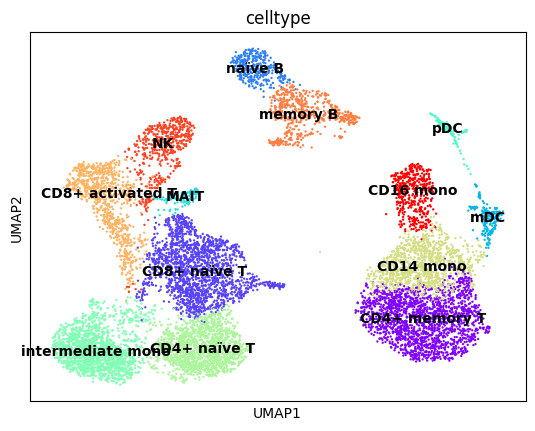

In [ ]:
sc.pl.umap(rna, color="celltype", legend_loc="on data")

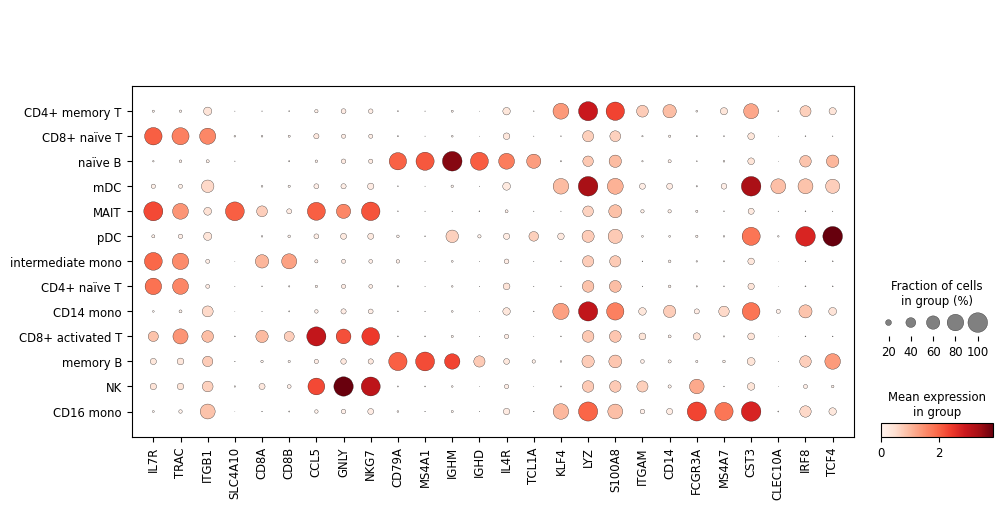

In [ ]:
marker_genes = ['IL7R', 'TRAC',
                'ITGB1', # CD29
                'SLC4A10',
                'CD8A', 'CD8B', 'CCL5',
                'GNLY', 'NKG7',
                'CD79A', 'MS4A1', 'IGHM', 'IGHD',
                'IL4R', 'TCL1A',
                'KLF4', 'LYZ', 'S100A8', 'ITGAM', # CD11b
                'CD14', 'FCGR3A', 'MS4A7',
                'CST3', 'CLEC10A', 'IRF8', 'TCF4']
sc.pl.dotplot(rna, marker_genes, groupby='celltype');

In [ ]:
mdata.write("data/pbmc10k.h5mu")